predicts the total ride duration of taxi trips in NYC

* data includes pickup time, geo-coordicates, numberof passengers, ..

* evaluation with RMSLE



* submission files should contain two columns id, trip_duration



In [2]:
import pandas as pd
train_f = pd.read_csv('train.csv')
train_f

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [3]:
print(train_f.info())
print(train_f.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean 

In [4]:
print(f"vendor id unique : {train_f['vendor_id'].nunique()}")
print(f"id unique : {train_f['id'].nunique()}")


vendor id unique : 2
id unique : 1458644


In [5]:
print(train_f.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [6]:
import numpy as np
print(f"passenger count : {np.sort(train_f['passenger_count'].unique())}")

passenger count : [0 1 2 3 4 5 6 7 8 9]


In [7]:
train_f.groupby('passenger_count').count().iloc[:,0]

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: id, dtype: int64

중간 정리

1458644개의 데이터 11개의 feature 중 numeric한건 7개 -> 1개는 target인 trip_duration

결측치는 없음.. 승객수에서 7명 이상부터는 데이터가 너무 작음.. 애초에 택시에 7명이 탈 수 있음..? -> 택시랑 리무진이니깐 리무진이면 가능

object중 datetime은 datetime으로 flag는(y/n) one hot encoding으로 처리하면 됨

numeric중 vendor id는 encoding 되어있는 feature라서 수적으로는 의미 없음
* 이러면 수적으로 의미있는 것은 5개의 feature / 승객수, 타고 내릴 때 위도 경도..

Text(0, 0.5, 'Frequency')

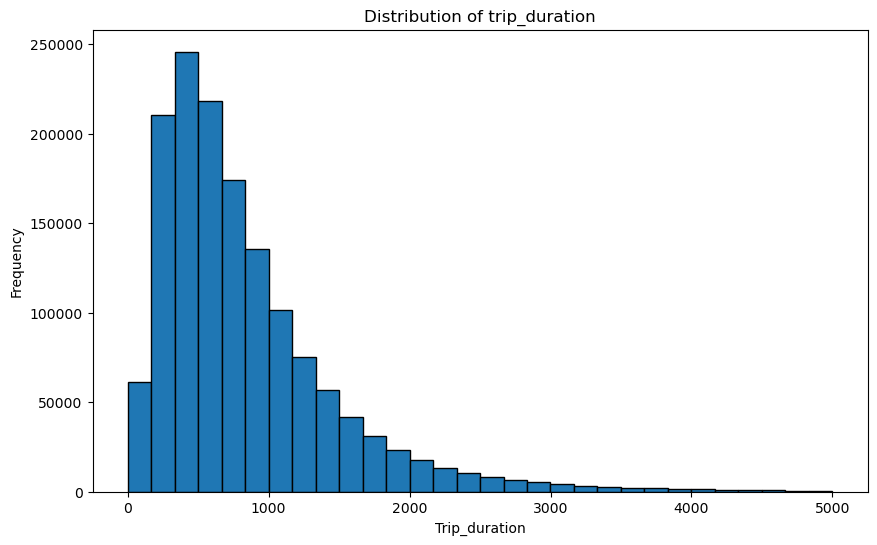

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,6))
plt.hist(train_f['trip_duration'][train_f['trip_duration']<5000], bins = 30, edgecolor = 'black')
plt.title('Distribution of trip_duration')
plt.xlabel('Trip_duration')
plt.ylabel('Frequency')

In [1]:
1//2

0